<a href="https://colab.research.google.com/github/Rudrajit12/ecommerce-ab-test-case-study/blob/main/A_B_Testing_Analysis_Landing_Page_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluating the Impact of a New Landing Page on User Conversion Rates: An A/B Testing Analysis for an E-Commerce Platform**

## **🧾 Problem Statement**

An e-commerce company recently launched a redesigned version of its website landing page, aiming to increase the number of users converting to paid customers. To assess the effectiveness of this change, an A/B test was conducted where users were randomly shown either the current version (control group) or the new version (treatment group) of the landing page.

The company now seeks a data-driven evaluation to determine whether the new page results in a significant improvement in conversion rates and whether it should be adopted more broadly.

---

## **💼 Business Objective:**

1. Increase Paid User Conversions

  - Primary Objective: Evaluate if the new landing page increases the percentage of visitors who sign up for the paid product.

  - Why It Matters: Higher conversion rates directly translate to more revenue and improved ROI on marketing efforts.

---

### **✅ Step 1: Understanding the Experiment Design**

Let's explicitly define the key components of this A/B test.

#### **🧪 Experiment Design Overview**

* **Test Objective:**

  Evaluate whether the new landing page (treatment) improves conversion rates compared to the current landing page (control).

* **Experiment Type:**

  Between-subjects randomized controlled A/B test

| Group         | Description                              |
| ------------- | ---------------------------------------- |
| **Control**   | Users shown the **current** landing page |
| **Treatment** | Users shown the **new** landing page     |


#### **🎯 Primary Metric**

* **Conversion Rate**
    
      = {Num of users who converted} / {Num of users who viewed the page}

* Binary Outcome:

  1 → Converted (signed up for paid product)

  0 → Did not convert

---

#### **📊 Hypotheses**

* **Null Hypothesis (H₀):**

      Conversion_control = Conversion_treatment

  There is **no difference** in conversion rates between the two pages.

---

* **Alternative Hypothesis (H₁):**

      Conversion_control != Conversion_treatment

  There **is a difference** (positive or negative) in conversion rates.

---

### **✅ Step 2: Data Loading**

**📥 What It Does:**

In this step, we import the A/B test datasets into the analysis environment (e.g., pandas DataFrames in Python) so we can work with them.

This includes:

- Reading CSV files (like ab_test.csv and countries_ab.csv)

- Verifying that the data was loaded successfully

- Reviewing the structure (rows, columns, column names)

In [40]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10,6]
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [41]:
# Load the main A/B test dataset
ab_test = pd.read_csv('/content/drive/MyDrive/EDA Projects/A-B Test Analysis E-Commerce Landing Page/ab_test.csv')

# Load the countries dataset
countries = pd.read_csv('/content/drive/MyDrive/EDA Projects/A-B Test Analysis E-Commerce Landing Page/countries_ab.csv')

# Preview the first few rows of each dataset
print("AB Test Dataset:")
print(ab_test.head())

print("\nCountries Dataset:")
print(countries.head())

AB Test Dataset:
       id     time  con_treat      page  converted
0  851104  11:48.6    control  old_page          0
1  804228  01:45.2    control  old_page          0
2  661590  55:06.2  treatment  new_page          0
3  853541  28:03.1  treatment  new_page          0
4  864975  52:26.2    control  old_page          1

Countries Dataset:
       id country
0  834778      UK
1  928468      US
2  822059      UK
3  711597      UK
4  710616      UK


In [42]:
# Merge the two datasets on 'id'
merged_df = ab_test.merge(countries, on='id', how='left')

# Preview the merged dataset
print("Merged Dataset:")
print(merged_df.head())

# Check the shape to ensure merge success
print(f"\nShape of merged dataset: {merged_df.shape}")

Merged Dataset:
       id     time  con_treat      page  converted country
0  851104  11:48.6    control  old_page          0      US
1  804228  01:45.2    control  old_page          0      US
2  661590  55:06.2  treatment  new_page          0      US
3  853541  28:03.1  treatment  new_page          0      US
4  864975  52:26.2    control  old_page          1      US

Shape of merged dataset: (294478, 6)


In [43]:
# View column names and data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
 5   country    294478 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


In [44]:
# Rename columns
merged_df = merged_df.rename(columns={
    'con_treat': 'group',
    'page': 'landing_page'
})

# Confirm the changes
print("Updated column names:", merged_df.columns.tolist())

Updated column names: ['id', 'time', 'group', 'landing_page', 'converted', 'country']


### **✅ Step 3: Data Cleaning & Validation**

We'll now verify the integrity and structure of the merged dataset. Here are the key checks:

**🔍 3.1 Check for Duplicates (especially duplicate user_id)**

In [45]:
# Check for duplicate user_ids
duplicate_users = merged_df[merged_df.duplicated(subset='id', keep=False)]
print(f"Number of duplicate user_ids: {duplicate_users.shape[0]}")

Number of duplicate user_ids: 7788


**🎯 Drop duplicates and keep only the first occurrence per user:**

In [46]:
# Drop duplicate user_ids, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='id', keep='first')

# Confirm duplicates are removed
print(f"Remaining duplicates: {merged_df.duplicated(subset='id').sum()}")

Remaining duplicates: 0


This ensures that:

* Every user is treated as a unique experiment unit.

* The sample remains clean and statistically valid.

**🔍 3.2 Check for Null or Missing Values**

In [47]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id              0
time            0
group           0
landing_page    0
converted       0
country         0
dtype: int64


**🔍 3.3 Check Group Assignment Consistency**

In [48]:
# Unique values in 'group' column
print("Unique groups:", merged_df['group'].unique())

# Cross-check landing_page assignment if applicable
if 'landing_page' in merged_df.columns:
    cross_tab = pd.crosstab(merged_df['group'], merged_df['landing_page'])
    print("\nGroup vs Landing Page mapping:\n", cross_tab)

Unique groups: ['control' 'treatment']

Group vs Landing Page mapping:
 landing_page  new_page  old_page
group                           
control           1006    144226
treatment       144314      1038


**🔄 Ensure Correct Group-to-Page Mapping**

To maintain the integrity of the experiment, we verify that each group is assigned the correct landing page:

- Control group should always see the old page

- Treatment group should always see the new page

This check prevents incorrect mappings that could invalidate the A/B test results.

In [49]:
# Keep only rows where group and landing_page match
merged_df = merged_df[
    ((merged_df['group'] == 'control') & (merged_df['landing_page'] == 'old_page')) |
    ((merged_df['group'] == 'treatment') & (merged_df['landing_page'] == 'new_page'))
]

In [50]:
# Cross-check page assignment if applicable
if 'landing_page' in merged_df.columns:
    cross_tab = pd.crosstab(merged_df['group'], merged_df['landing_page'])
    print("\nGroup vs Landing Page mapping:\n", cross_tab)


Group vs Landing Page mapping:
 landing_page  new_page  old_page
group                           
control              0    144226
treatment       144314         0


**🔍 3.4 Check Conversion Values Validity**

In [51]:
# Check unique values in 'converted' column
print("Unique values in 'converted':", merged_df['converted'].unique())

Unique values in 'converted': [0 1]


### **✅ Step 4: Exploratory Data Analysis (EDA)**

**📊 What It Does:**

In this step, we explore and summarize the dataset to understand patterns, relationships, and potential issues before performing any statistical testing.

Key tasks include:

- Calculating conversion rates for each group (control vs. treatment)

- Checking sample sizes and balance between groups

- Looking at the distribution of conversions

- Creating visualizations (bar plots, histograms) for clarity

**4.1 Basic Summary Statistics**

In [52]:
# Summary of numeric columns
print(merged_df.describe(include='all'))

                   id     time      group landing_page      converted country
count   288540.000000   288540     288540       288540  288540.000000  288540
unique            NaN    35991          2            2            NaN       3
top               NaN  53:18.9  treatment     new_page            NaN      US
freq              NaN       21     144314       144314            NaN  202185
mean    788029.850724      NaN        NaN          NaN       0.119509     NaN
std      91225.822546      NaN        NaN          NaN       0.324387     NaN
min     630000.000000      NaN        NaN          NaN       0.000000     NaN
25%     709051.750000      NaN        NaN          NaN       0.000000     NaN
50%     788048.500000      NaN        NaN          NaN       0.000000     NaN
75%     866973.500000      NaN        NaN          NaN       0.000000     NaN
max     945999.000000      NaN        NaN          NaN       1.000000     NaN


**4.2 Sample Size Per Group**

In [53]:
# count of each group
group_counts = merged_df['group'].value_counts()
print("Number of users in each group:\n", group_counts)

Number of users in each group:
 group
treatment    144314
control      144226
Name: count, dtype: int64


**4.3 Conversion Rate per Group**

In [54]:
conversion_rates = merged_df.groupby('group')['converted'].mean()
print("Conversion rates by group:\n", conversion_rates)

Conversion rates by group:
 group
control      0.120290
treatment    0.118727
Name: converted, dtype: float64


**4.4 Visualize Conversion Rates**

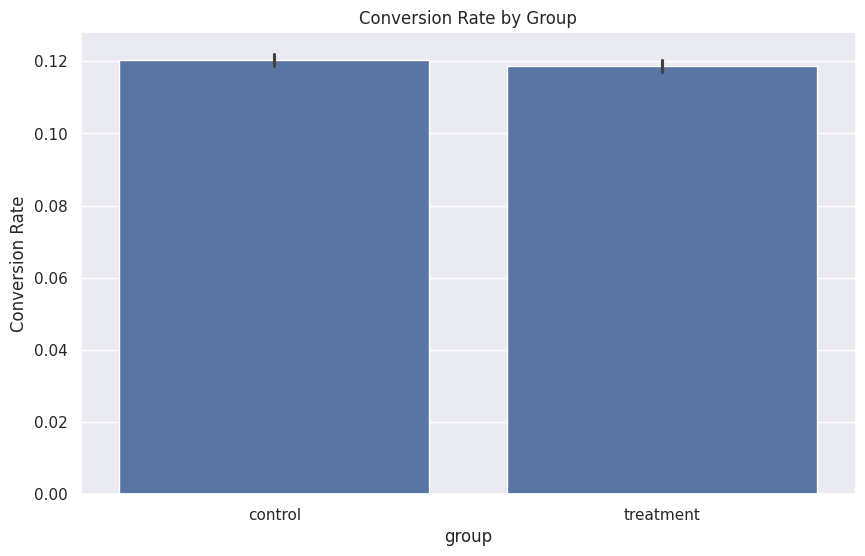

In [55]:
# visualize conversion rates
sns.barplot(x='group', y='converted', data=merged_df)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()

**4.5 Check Distribution of Countries per Group**

country      CA     UK      US
group                         
control    7138  36100  100988
treatment  7256  35861  101197


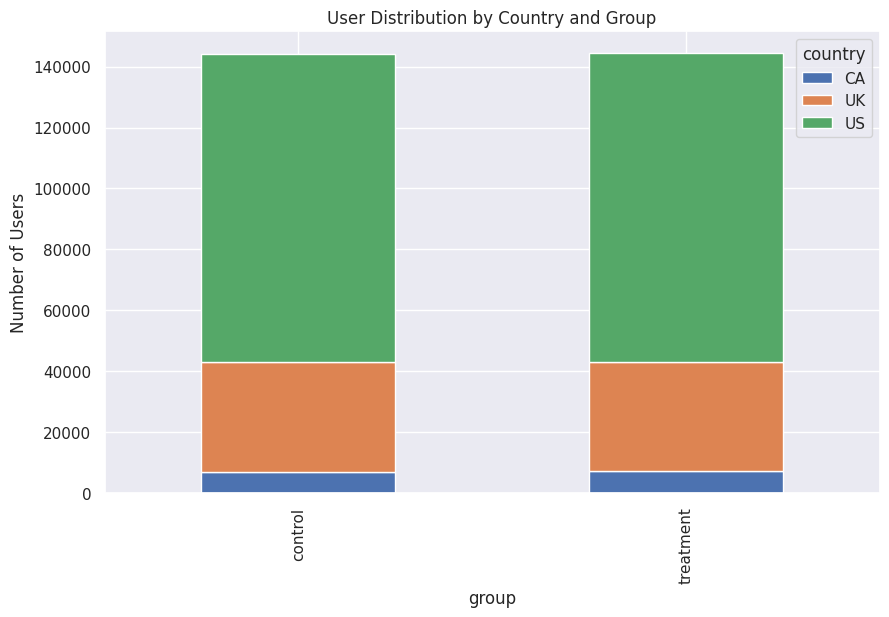

In [56]:
# plot the distribution of countries per group
country_counts = merged_df.groupby(['group', 'country']).size().unstack(fill_value=0)
print(country_counts)

country_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('User Distribution by Country and Group')
plt.ylabel('Number of Users')
plt.show()

### **✅ Step 5: Statistical Testing**

This is where we formally evaluate if the observed difference in conversion rates between the treatment and control groups is statistically significant, i.e., unlikely due to random chance.

**🎯 Objective**

Determine whether the new landing page (treatment) results in a significant change (increase or decrease) in conversion rate compared to the old page (control).

#### **🧪 Test Type**

We'll use a two-sample Z-test for proportions, appropriate when:

- You’re comparing two independent proportions.

- Sample size is large (which we assume here).

**5.1 Extract Counts for the Z-test**

In [57]:
# Get counts for each group
control_data = merged_df[merged_df['group'] == 'control']
treatment_data = merged_df[merged_df['group'] == 'treatment']

# Sample sizes
n_control = control_data.shape[0]
n_treatment = treatment_data.shape[0]

# Conversions
conversions_control = control_data['converted'].sum()
conversions_treatment = treatment_data['converted'].sum()

# Conversion rates
cr_control = conversions_control / n_control
cr_treatment = conversions_treatment / n_treatment

print(f"Control Conversion Rate: {cr_control:.4f}")
print(f"Treatment Conversion Rate: {cr_treatment:.4f}")

Control Conversion Rate: 0.1203
Treatment Conversion Rate: 0.1187


**5.2 Perform Z-test for Proportions**

In [58]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of conversions
conversions = [conversions_treatment, conversions_control]

# Sample sizes
samples = [n_treatment, n_control]

# Perform two-tailed z-test
z_stat, p_val = proportions_ztest(count=conversions, nobs=samples)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: -1.2942
P-value: 0.1956


**5.3 Interpret Results**

Use a significance level of α = 0.05:

In [59]:
alpha = 0.05

if p_val < alpha:
    print("❗ Result: Statistically Significant — Reject Null Hypothesis")
else:
    print("✅ Result: Not Statistically Significant — Fail to Reject Null Hypothesis")

✅ Result: Not Statistically Significant — Fail to Reject Null Hypothesis


#### **🎯 Interpretation**

- The p-value (0.1956) is greater than 0.05, which means:

  - We fail to reject the null hypothesis.

  - The observed difference in conversion rates (12.03% vs. 11.87%) is not statistically significant.

#### **📌 Conclusion (Statistical Perspective)**

There is no statistically significant evidence that the new landing page performs differently than the old one.
The small observed decrease in conversion could easily be due to chance.

### **✅ Step 6: Business Impact Assessment**

While the statistical test showed no significant difference, it's still crucial to evaluate whether the magnitude of the difference has a meaningful business impact — even if it's not statistically significant.

**🎯 Objective**

“Would this observed difference in conversion rate result in a meaningful gain or loss in business outcomes (like revenue), if we implemented the new page?”

| Metric          | Control | Treatment | Difference |
| --------------- | ------- | --------- | ---------- |
| Conversion Rate | 12.03%  | 11.87%    | **-0.16%** |

---

So, if 100,000 users visited:

- Control → ~12,030 would convert

- Treatment → ~11,870 would convert
  → 160 fewer conversions

**💰 Assume a Value per Conversion (Hypothetical)**

Let’s assume:
- Each conversion (signup/purchase) brings in $100 revenue.

In [60]:
# Revenue impact per conversion
value_per_conversion = 100

# Drop in conversions per 100,000 users
conversion_diff = cr_treatment - cr_control
user_count = 100000
revenue_impact = conversion_diff * user_count * value_per_conversion

print(f"Estimated revenue impact per 100K users: ${revenue_impact:.2f}")

Estimated revenue impact per 100K users: $-15631.58


#### **💡 Business Impact Summary**

Estimated revenue impact (per 100K users):
- 🟥 –$15,631.58

This means that if the new landing page were rolled out, and 100,000 users visited:

- The company would earn $15.6K less in revenue compared to the current (control) page.

- This is both a negative and meaningful financial impact.

## **✅ Step 7: Final Recommendation**

### 🎯 Recommendation: **Do Not Implement the New Landing Page (for Now)**

---

### **📊 Key Findings:**

* **No Statistically Significant Difference**

  The A/B test results show no meaningful difference in conversion rates between the new page (11.87%) and the current page (12.03%).
  *(p-value = 0.1956 > 0.05)*

* **Negative Business Impact**
  
  Rolling out the new page would result in **\~160 fewer conversions per 100,000 visitors**, translating to an estimated **revenue loss of \$15,631** for every 100K users (assuming \$100 per conversion).

---

### **📌 Conclusion:**

While the test did not show a significant difference from a statistical standpoint, the **slight drop in performance** of the new landing page is **not only negative but also financially impactful**.

We recommend **continuing with the current page** and **not proceeding with the new version** in its current form.

---

### **🛠 Suggested Next Steps:**

* 📈 **Iterate on the new page design** using insights from user behavior (e.g. click heatmaps, bounce rates).
* 🧪 **Run targeted experiments** for specific segments (e.g., by country or device type) where the new page might perform better.
* 🔁 **Re-test with a revised variant** after addressing potential usability or content concerns.

---
